# [TAREA 05] Ejercicios unidad 2-B
Dentro de este notebook se podrá encontrar ejercicios relacionados a:
- Método de la Bisección
- Método de Newton
- Método de la Secante

Para ello, primero se partirá con la generación de código que permitirá realizar el deber planteado.

### MÉTODO DE LA BISECCIÓN

In [ ]:
def biseccion(f, a, b, tol, max_iter):
    if f(a) * f(b) >= 0:
        print("El intervalo inicial no es válido. Asegúrate de que f(a) * f(b) < 0.")
        return None, 0

    for n in range(max_iter):
        c = (a + b) / 2  # Punto medio
        fc = f(c)

        if abs(fc) < tol or (b - a) / 2 < tol:  # Criterio de parada
            print(f"Raíz encontrada en x = {c} después de {n} iteraciones.")
            return c, n

        # Elegir el subintervalo que contiene la raíz
        if f(a) * fc < 0:
            b = c
        else:
            a = c

    print("Se alcanzó el número máximo de iteraciones.")
    return (a + b) / 2, max_iter


### MÉTODO DE NEWTON-RAPHSON
Es un método iterativo el cual fue creado para encontrar las raices de una funcion $F(x)$. Que en otras palabras, son los valores de $x$ donde $F(x)=0$


In [ ]:
import math

def newton_raphson(f, df, x0, tol, max_iter):
    xn = x0
    for n in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)
        
        if abs(fxn) < tol:  # La raíz es suficientemente precisa
            print(f"Raíz encontrada en x = {xn} después de {n} iteraciones.")
            return xn, n
        
        # Si la derivada es muy pequeña, no podemos continuar con el método de Newton
        if abs(dfxn) < 1e-10:
            print(f"Derivada muy pequeña en x = {xn}. No se puede continuar.")
            return None, n
        
        # Actualizar el valor de xn usando la fórmula de Newton
        xn = xn - fxn / dfxn
    
    # Si se alcanzó el número máximo de iteraciones sin converger
    print("Se alcanzó el número máximo de iteraciones.")
    return xn, max_iter

### MÉTODO DE LA SECANTE

In [ ]:
import numpy as np

def metodo_secante(f, x0, x1, tol, max_iter):
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        if abs(fx1) < tol:  # La raíz es suficientemente precisa
            print(f"Raíz encontrada en x = {x1} después de {n} iteraciones.")
            return x1, n

        # Evitar división por cero
        if fx1 - fx0 == 0:
            print("Error: División por cero en el método de la secante.")
            return None, n

        # Calcular el siguiente punto
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        # Verificar avance
        if abs(x2 - x1) < tol:
            print(f"Convergencia alcanzada en x = {x2} después de {n} iteraciones.")
            return x2, n

        # Actualizar valores
        x0, x1 = x1, x2

    print("Se alcanzó el número máximo de iteraciones sin convergencia.")
    return x1, max_iter



### CONJUNTO DE EJERCICIOS

#### EJERCICIO UNO
Sea $𝑓(𝑥) = −𝑥^3 − cos(𝑥)$ y $𝑝_0 = −1$. Use el método de Newton y de la Secante para encontrar $𝑝_2$. ¿Se podría usar $𝑝_0 = 0$?


In [79]:
import math

# Definir la función y su derivada
def f(x):
    return -x**3 - math.cos(x)

def df(x):
    return -3 * x**2 + math.sin(x)

# Parámetros iniciales
x0 = -1  # Aproximación inicial
tol = 1e-6  # Tolerancia
max_iter = 100  # Número máximo de iteraciones

# Llamar al método de Newton-Raphson
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)

# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de Newton-Raphson no pudo encontrar una raíz.")


Raíz encontrada en x = -0.865474075952977 después de 3 iteraciones.
Raíz aproximada: -0.865474, encontrada en 3 iteraciones.


In [38]:
# METODO DE LA SECANTE
def f(x):
    return -x**3-math.cos(x)

# Valores iniciales
x0 = -1
x1 = 1
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")



Raíz encontrada en x = -0.8654743032026917 después de 8 iteraciones.
Raíz aproximada: -0.865474, encontrada en 8 iteraciones.


#### EJERCICIO DOS
Encuentre soluciones precisas dentro de 10-4 para los siguientes problemas:

a. $x^3-2x^2-5=0$ para $[1,4]$

In [40]:
# METODO DE LA SECANTE
def f(x):
    return x**3-2*x**2-5

# Valores iniciales
x0 = 1
x1 = 4
tol=1e-4
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Raíz encontrada en x = 2.6906484961992585 después de 9 iteraciones.
Raíz aproximada: 2.690648, encontrada en 9 iteraciones.


b. $x^3+3x^2-1=0$ para $[-3,-2]$

In [39]:
# METODO DE LA SECANTE
def f(x):
    return x**3+3*x**2-1

# Valores iniciales
x0 = -3
x1 = -2
tol=1e-4
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Convergencia alcanzada en x = -2.879385194736809 después de 5 iteraciones.
Raíz aproximada: -2.879385, encontrada en 5 iteraciones.


c. $x-cos(x)=0$ para $[0,pi/2]$

In [41]:
# METODO DE LA SECANTE
def f(x):
    return x-math.cos(x)

# Valores iniciales
x0 = 0
x1 = math.pi/2
tol=1e-4
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Raíz encontrada en x = 0.7390834365030763 después de 4 iteraciones.
Raíz aproximada: 0.739083, encontrada en 4 iteraciones.


d. $x-0.8-0.2sen(x)=0$ para $[0,pi/2]$

In [42]:
# METODO DE LA SECANTE
def f(x):
    return x-0.8+0.2*math.sin(x)

# Valores iniciales
x0 = 0
x1 = math.pi/2
tol=1e-4
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Raíz encontrada en x = 0.6750222077032085 después de 3 iteraciones.
Raíz aproximada: 0.675022, encontrada en 3 iteraciones.


#### EJERCICIO TRES
Use los 2 métodos en esta sección para encontrar las soluciones dentro de 10−5 para los siguientes problemas.

a. $3x-e^x=0$ para $1<=x<=2$

In [49]:
# METODO DE NEWTON
def f(x):
    return 3*x-math.e**x

def df(x):
    return 3-math.e**x

# Aproximación inicial
x0 = 1.5
tol=1e-5
max_iter=100
# Ejecutar el método
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)
print(f"Raíz aproximada: {raiz}, encontrada en {iteraciones} iteraciones.")

Raíz encontrada en x = 1.5121346254271246 después de 2 iteraciones.
Raíz aproximada: 1.5121346254271246, encontrada en 2 iteraciones.


In [43]:
# METODO DE LA SECANTE
def f(x):
    return 3*x-math.e**x

# Valores iniciales
x0 = 1
x1 = 2
tol=1e-5
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Raíz encontrada en x = 1.5121339760022818 después de 8 iteraciones.
Raíz aproximada: 1.512134, encontrada en 8 iteraciones.


b. $2x-3cos(x)-e^x=0$ para $1<=x<=2$

In [ ]:
# METODO DE NEWTON
# Definir la función f(x) y su derivada df(x)
def f(x):
    return 2*x - 3*math.cos(x) - math.e**x

def df(x):
    return 2 + 3*math.sin(x) - math.e**x

# Aproximación inicial
x0 = 0 
tol = 1e-5
max_iter = 100

# Ejecutar el método de Newton-Raphson
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)

# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de Newton-Raphson no pudo encontrar una raíz.")

Se alcanzó el número máximo de iteraciones.
Raíz aproximada: 7.032900, encontrada en 100 iteraciones.


In [63]:
# METODO DE LA SECANTE
def f(x):
    return 2*x-3*math.cos(x)-math.e**x

# Valores iniciales
x0 = 1
x1 = 2
tol=1e-5
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Convergencia alcanzada en x = 2.2461216611195 después de 64 iteraciones.
Raíz aproximada: 2.246122, encontrada en 64 iteraciones.


#### EJERCICIO CUATRO
El polinomio de cuarto grado<br>
$f(x)=230x^4+18x^3+9x^2-221x-9$<br>
tiene dos ceros reales, uno en [−1,0] y el otro en [0,1]. Intente aproximar estos ceros dentro de 10−6 con:



a. El método de la secante (use los extremos como las estimaciones iniciales)

In [74]:
# METODO DE LA SECANTE
def f(x):
    return 230*x**4+18*x**3+9*x**2-221*x-9

# Valores iniciales
x0 = -1
x1 = 0
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")

Convergencia alcanzada en x = -0.040659288315725135 después de 3 iteraciones.
Raíz aproximada: -0.040659, encontrada en 3 iteraciones.


In [75]:
# METODO DE LA SECANTE
def f(x):
    return 230*x**4+18*x**3+9*x**2-221*x-9

# Valores iniciales
x0 = 0
x1 = 1
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")

Convergencia alcanzada en x = -0.04065928831557162 después de 10 iteraciones.
Raíz aproximada: -0.040659, encontrada en 10 iteraciones.


b. El método de Newton (use el punto medio como estimación inicial)

In [55]:
# METODO DE NEWTON
def f(x):
    return 230*x**4+18*x**3+9*x**2-221*x-9

def df(x):
    return 930*x**3+54*x**2+18*x**2-221

# Aproximación inicial
x0 = -0.5
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)
print(f"Raíz aproximada: {raiz}, encontrada en {iteraciones} iteraciones.")

Raíz encontrada en x = -0.04065928833207324 después de 5 iteraciones.
Raíz aproximada: -0.04065928833207324, encontrada en 5 iteraciones.


In [56]:
# METODO DE NEWTON
def f(x):
    return 230*x**4+18*x**3+9*x**2-221*x-9

def df(x):
    return 930*x**3+54*x**2+18*x**2-221

# Aproximación inicial
x0 = 0.5
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)
print(f"Raíz aproximada: {raiz}, encontrada en {iteraciones} iteraciones.")

Raíz encontrada en x = -0.040659288048739924 después de 6 iteraciones.
Raíz aproximada: -0.040659288048739924, encontrada en 6 iteraciones.


#### EJERCICIO CINCO
La función 𝑓(𝑥) = tan 𝜋 𝑥 − 6 tiene cero en (1/𝜋) arcotangente 6 ≈ 0.447431543. Sea 𝑝0 = 0 y 𝑝1 = 0.48 y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?

a. Método de bisección

In [72]:
# METODO DE LA BISECCION
import math
# Definir la función
def f(x):
    return math.tan(math.pi * x) - 6

# Intervalo inicial
a = 0
b = 0.48
tol=1e-6
max_iter=100

# Ejecutar el método
raiz, iteraciones = biseccion(f, a, b, tol, max_iter)
print(f"Raíz aproximada: {raiz}, encontrada en {iteraciones} iteraciones.")


Raíz encontrada en x = 0.4474319458007812 después de 18 iteraciones.
Raíz aproximada: 0.4474319458007812, encontrada en 18 iteraciones.


b. método de Newton

In [70]:
# METODO DE NEWTON
def f(x):
    return math.tan(math.pi * x) - 6

def df(x):
    return math.pi * (1 / math.cos(math.pi * x))**2

# Aproximación inicial
x0 = 0.2
tol=1e-6
max_iter=100
# Ejecutar el método de Newton-Raphson
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)

# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de Newton-Raphson no pudo encontrar una raíz.")

Raíz encontrada en x = 5.4474315432924465 después de 10 iteraciones.
Raíz aproximada: 5.447432, encontrada en 10 iteraciones.


c. método de la secante

In [78]:
# METODO DE LA SECANTE
def f(x):
    return math.tan(math.pi * x) - 6

# Valores iniciales
x0 = 0.1
x1 = 0.48
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)
# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")

Se alcanzó el número máximo de iteraciones sin convergencia.
Raíz aproximada: -132122781871731033105904421106444579184312320.000000, encontrada en 100 iteraciones.


#### EJERCICO SEIS
La función descrita por $f(x) = \ln(x^2 + 1) - e^{0.4x} \cos(\pi)$ tiene un número infinito de ceros.

a. Determine, dentro de 10−6, el único cero negativo.

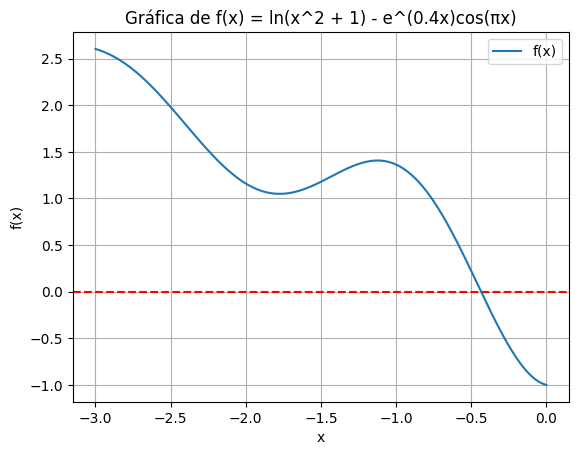

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# Crear valores de x en el rango [-3, 0]
x = np.linspace(-3, 0, 500)
y = f(x)

# Graficar
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.plot(x, y, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de f(x) = ln(x^2 + 1) - e^(0.4x)cos(πx)")
plt.legend()
plt.grid()
plt.show()


In [11]:
# METODO DE NEWTON
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

def df(x):
    return (2 * x / (x**2 + 1)) - (0.4 * np.exp(0.4 * x) * np.cos(np.pi * x)) + (np.pi * np.exp(0.4 * x) * np.sin(np.pi * x))

# Aproximación inicial
x0 =-0.5
tol=1e-6
max_iter=10
# Ejecutar el método
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)
print(f"Raíz aproximada: {raiz}, encontrada en {iteraciones} iteraciones.")

Raíz encontrada en x = -0.4341430585731075 después de 2 iteraciones.
Raíz aproximada: -0.4341430585731075, encontrada en 2 iteraciones.


b. Determine, dentro de 10−6, los cuatro ceros positivos más pequeños.

c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de 𝑓.

d. Use la parte c) para determinar, dentro de 10−6
, el vigesimoquinto cero positivo más pequeño de 𝑓.

#### EJERCICIO SIETE

La función $f(x) = x^{1/3}$ tiene raíz en $x = 0$. Usando el punto de inicio $x = 1$ y $p_0 = 5$, $p_1 = 0.5$ para el método de la secante, compare los resultados de los métodos de la secante y de Newton.


In [82]:
# METODO DE NEWTON
def f(x):
    return x**(1/3)
def df(x):
    if abs(x) < 1e-6:  
        return 1e6 
    return (1 / 3) * x**(-2 / 3)

# Aproximación inicial
x0 =1
tol=1e-6
max_iter=100
# Ejecutar el método
raiz, iteraciones = newton_raphson(f, df, x0, tol, max_iter)
print(f"Raíz aproximada: {raiz}, encontrada en {iteraciones} iteraciones.")

Derivada muy pequeña en x = (281474976710639.3-0.6783456561375787j). No se puede continuar.
Raíz aproximada: None, encontrada en 48 iteraciones.


In [ ]:
#METODO DE LA SECANTE
def f(x):
    return np.cbrt(x)  # x^(1/3)

# Valores iniciales
x0 = 0.01
x1 = 0.1
tol = 1e-6
max_iter = 100

# Ejecutar el método
raiz, iteraciones = metodo_secante(f, x0, x1, tol, max_iter)

# Mostrar resultados
if raiz is not None:
    print(f"Raíz aproximada: {raiz:.6f}, encontrada en {iteraciones} iteraciones.")
else:
    print("El método de la secante no pudo encontrar una raíz.")


Se alcanzó el número máximo de iteraciones sin convergencia.
Raíz aproximada: -0.003025, encontrada en 100 iteraciones.
